<a href="https://colab.research.google.com/github/AliKhyar/Machine-Learning-stuff/blob/master/KerasClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

import matplotlib.pyplot as plt
# import the data
from keras.datasets import mnist


Using TensorFlow backend.


In [0]:
# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [13]:
print(f'X_train{X_train.shape} \n y_train {y_train.shape} \n X_test {X_test.shape}\n y_test {y_test.shape}')

X_train(60000, 28, 28) 
 y_train (60000,) 
 X_test (10000, 28, 28)
 y_test (10000,)


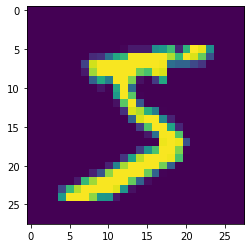

In [14]:
plt.imshow(X_train[0])

In [0]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

In [16]:
print(f'X_train{X_train.shape}\n X_test {X_test.shape}')

X_train(60000, 784)
 X_test (10000, 784)


In [0]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [18]:
y_train[0]

5

In [19]:
#print(X_train[0])

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


In [20]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [22]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





 - 21s - loss: 0.1868 - acc: 0.9443 - val_loss: 0.1113 - val_acc: 0.9642
Epoch 2/10
 - 20s - loss: 0.0783 - acc: 0.9758 - val_loss: 0.0789 - val_acc: 0.9760
Epoch 3/10
 - 21s - loss: 0.0537 - acc: 0.9831 - val_loss: 0.0961 - val_acc: 0.9731
Epoch 4/10
 - 20s - loss: 0.0403 - acc: 0.9871 - val_loss: 0.0868 - val_acc: 0.9724
Epoch 5/10
 - 20s - loss: 0.0316 - acc: 0.9897 - val_loss: 0.0712 - val_acc: 0.9799
Epoch 6/10
 - 20s - loss: 0.0265 - acc: 0.9917 - val_loss: 0.0841 - val_acc: 0.9774
Epoch 7/10
 - 20s - loss: 0.0225 - acc: 0.9926 - val_loss: 0.0762 - val_acc: 0.9812
Epoch 8/10
 - 20s - loss: 0.0191 - acc: 0.9937 - val_loss: 0.0888 - val_acc: 0.9786
Epoch 9/10
 - 20s - loss: 0.0168 - acc: 0.9949 - val_loss: 0.0770 - val_acc: 0.9807
Epoch 10/10
 - 20s - loss: 0.0176 - acc: 0.9945 - val_loss: 0.1196 - val_acc: 0.9762


In [23]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))        

Accuracy: 0.9762% 
 Error: 0.023800000000000043


In [0]:
model.save('classification_model.h5')

In [0]:
# from keras.models import load_model
# pretrained_model = load_model('classification_model.h5')